In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
import matplotlib.pyplot as plt
import re

In [5]:
##importing data
df=pd.read_csv('train_data.csv')

In [6]:
##checking head of the data
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

## Objective

- The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.


- The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

- D_* = Delinquency variables
- S_* = Spend variables
- P_* = Payment variables
- B_* = Balance variables
- R_* = Risk variables

In [10]:
##checking the info of the data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Data columns (total 190 columns):
 #    Column       Dtype  
---   ------       -----  
 0    customer_ID  object 
 1    S_2          object 
 2    P_2          float64
 3    D_39         float64
 4    B_1          float64
 5    B_2          float64
 6    R_1          float64
 7    S_3          float64
 8    D_41         float64
 9    B_3          float64
 10   D_42         float64
 11   D_43         float64
 12   D_44         float64
 13   B_4          float64
 14   D_45         float64
 15   B_5          float64
 16   R_2          float64
 17   D_46         float64
 18   D_47         float64
 19   D_48         float64
 20   D_49         float64
 21   B_6          float64
 22   B_7          float64
 23   B_8          float64
 24   D_50         float64
 25   D_51         float64
 26   B_9          float64
 27   R_3          float64
 28   D_52         float64
 29   P_3          float64
 30   B_10         flo

In [12]:
##rectifying the date column, converting into datetime  object
df['S_2']=pd.to_datetime(df['S_2'])

In [13]:
##checking the shape of the data
df.shape

(5531451, 190)

# Importing the label data for the train data set

In [14]:
##importing the train label data
df_label=pd.read_csv('train_labels.csv')

In [15]:
df_label.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [16]:
##checking shape
df_label.shape

(458913, 2)

In [17]:
##checking the number of unique customer id in df
df['customer_ID'].nunique()

458913

## Insight:

- The number of unique customer id's matches with the number of customer ids in the train data (df).


- We would need to join both the data frame to get the label for the customer id's

In [19]:
##joining both the tables and storing in new_df
new_df=pd.merge(df, df_label, how='left',on='customer_ID')

In [20]:
##checking head of the merged data
new_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.0048

In [23]:
##checking the %nan values
null_perc=round((new_df.isnull().sum()/new_df.shape[0])*100,2)

In [25]:
##checking the rows with high null values
null_perc.sort_values(ascending=False)

D_87           99.93
D_88           99.89
D_108          99.48
D_111          99.43
D_110          99.43
B_39           99.39
D_73           98.99
B_42           98.71
D_138          96.48
D_136          96.48
D_137          96.48
D_134          96.48
D_135          96.48
R_9            94.35
B_29           93.10
D_106          90.21
D_132          90.19
D_49           90.14
R_26           88.98
D_76           88.75
D_66           88.73
D_42           85.69
D_142          82.93
D_53           73.84
D_82           73.37
D_50           56.81
B_17           56.72
D_105          54.62
D_56           54.07
S_9            53.04
D_77           45.45
D_43           29.98
S_27           25.33
D_46           21.91
S_3            18.45
S_7            18.45
D_62           13.71
D_48           12.99
D_61           10.81
P_3             5.45
D_44            4.96
D_78            4.96
D_64            3.93
D_68            3.91
D_69            3.52
D_83            3.52
D_55            3.34
D_116        

- From the above table it  could be seen that there are lots of null values and it needs to be handled before we move to modelling.

In [27]:
##checking class imbalance
new_df['target'].value_counts()

0    4153582
1    1377869
Name: target, dtype: int64

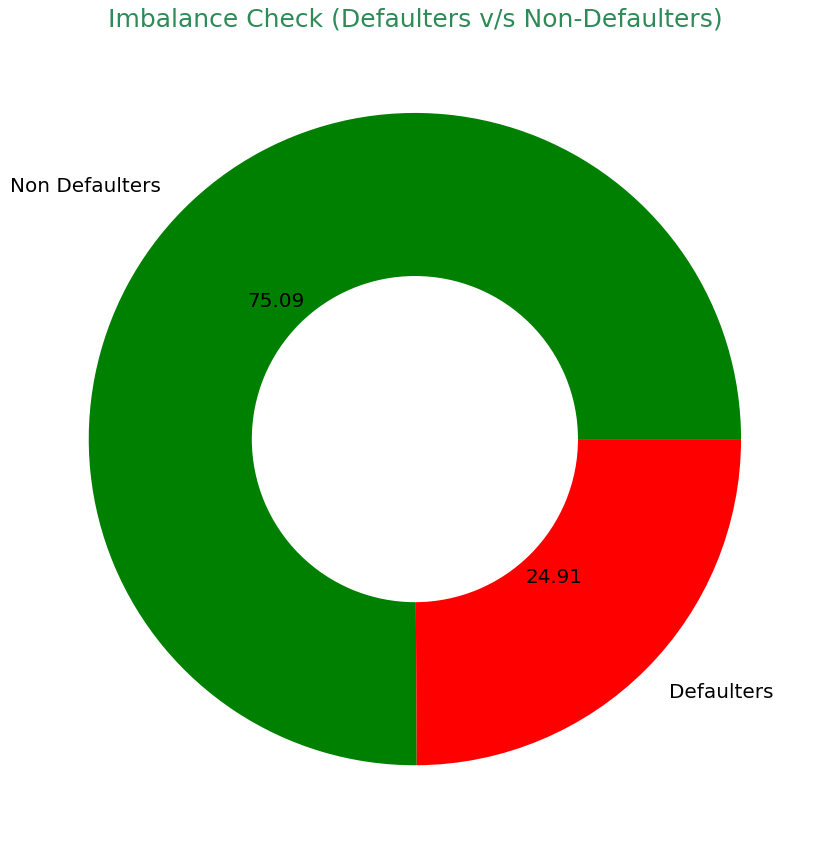

In [37]:
##plotting chart to see it visually
plt.figure(figsize=[20,15])
plt.pie(new_df['target'].value_counts(normalize=True),colors=['Green','Red'],labels=['Non Defaulters','Defaulters'],
       autopct='%.2f',textprops={'fontsize':20},radius=1)
plt.pie([1],colors=['w'],radius=0.5)
plt.title('Imbalance Check (Defaulters v/s Non-Defaulters)',fontdict={'size':25,'color':'Seagreen'})
plt.show()

### Insights

- From here, it could be seen that there are 75% of non defaulters and 25% of defaulters in our training data.


- This is clearly a case of class imbalance and before we move to modelling, we need to take care of this such that predictions are correct.

In [42]:
##segregating the type of columns we have in our data
cat_cols=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
print("Number of categorical columns are :{}".format(len(cat_cols)))

Number of categorical columns are :11


In [43]:
##seperatiing the numerical columns from the set of columns available
num_cols=[i for i in list(new_df.columns) if i not in cat_cols]
print("Number of numerical columns are :{}".format(len(num_cols)))

Number of numerical columns are :180


In [50]:
##seperating the numerical variables based on the type of the variables
##seperating the delinquency variable
del_num_var=[ i for i in num_cols if re.search("^D_",i)]
print("Number of delinquency numerical columns are :{}".format(len(del_num_var)))

Number of delinquency numerical columns are :87


In [51]:
##delinquency categorical variable
del_cat_var=['D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
print("Number of delinquency categorical columns are :{}".format(len(del_cat_var)))

Number of delinquency categorical columns are :9


In [52]:
##spend numerical variables
spe_num_var=[ i for i in num_cols if re.search("^S_",i)]
print("Number of spend numerical columns are :{}".format(len(spe_num_var)))

Number of spend numerical columns are :22


In [53]:
##payment numerical variables
pay_num_var=[ i for i in num_cols if re.search("^P_",i)]
print("Number of payment numerical columns are :{}".format(len(pay_num_var)))

Number of payment numerical columns are :3


In [54]:
##balance numerical variables
bal_num_var=[ i for i in num_cols if re.search("^B_",i)]
print("Number of balance numerical columns are :{}".format(len(bal_num_var)))

Number of balance numerical columns are :38


In [55]:
##balance categorical variables
bal_cat_var=['B_30', 'B_38']
print("Number of balance categorical columns are :{}".format(len(bal_cat_var)))

Number of balance categorical columns are :2


In [56]:
##risk numerical variables
risk_num_var=[ i for i in num_cols if re.search("^R_",i)]
print("Number of risk numerical columns are :{}".format(len(risk_num_var)))

Number of risk numerical columns are :28


In [61]:
##Appending all the information to a dataframe
new_df_info=pd.DataFrame({'Categorical Cols':len(cat_cols),'Numerical Cols':len(num_cols),'Delinquency Num Cols':len(del_num_var),
                         'Delinquency Cat Cols':len(del_cat_var),'Spend Num Cols':len(spe_num_var),'Payment Num Cols':len(pay_num_var),
                         'Balance Num Cols':len(bal_num_var),'Balance Cat Cols':len(bal_cat_var),'Risk Num Cols':len(risk_num_var)}, index=[0])

In [64]:
new_df_info

,Categorical Cols,Numerical Cols,Delinquency Num Cols,Delinquency Cat Cols,Spend Num Cols,Payment Num Cols,Balance Num Cols,Balance Cat Cols,Risk Num Cols
0,11,180,87,9,22,3,38,2,28
